In [1]:
import Pkg
Pkg.activate(".")

  Activating new project at `~/Documents/programming/BME-574-2024/DATA`


In [2]:
Pkg.add(["Random","LinearAlgebra","FFTW","Plots"])

    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/JuliaComputingRegistry.toml`
    Updating registry at `~/.julia/registries/JuliaHubRegistry.toml`
   Resolving package versions...
    Updating `~/Documents/programming/BME-574-2024/DATA/Project.toml`
  [7a1cc6ca] + FFTW v1.8.0
  [91a5bcdd] + Plots v1.40.8
  [37e2e46d] + LinearAlgebra
  [9a3f8284] + Random
  No Changes to `~/Documents/programming/BME-574-2024/DATA/Manifest.toml`
Precompiling project...
  ✓ XSLT_jll
  ✓ Qt6ShaderTools_jll
  ✓ Pango_jll
  ✓ Qt6Declarative_jll
  ✓ GR_jll
  ✓ GR
  ✓ Plots
  ✓ Plots → UnitfulExt
  8 dependencies successfully precompiled in 32 seconds. 154 already precompiled.


In [3]:
using FFTW, Plots

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [4]:
dx = 0.001
L = π
x = (-1+dx:dx:1)*L

-3.1384510609362035:0.0031415926535897933:3.141592653589793

In [5]:
n = length(x)
nquart = Int64(floor(n/4))

500

In [7]:
f = zeros(n)
f[nquart:2*nquart] = 4 .* (1:nquart+1)/n
f[2*nquart+1:3*nquart] = 1 .- 4 .* (0:nquart-1)/n

1.0:-0.002:0.0020000000000000018

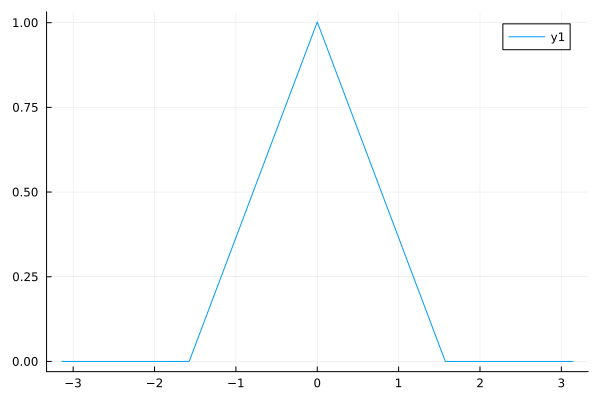

In [8]:
plot(x,f)

In [13]:
m = 100
A0 = sum(f) * dx
A = zeros(m)
B = zeros(m)
fFS = A0/2
for k in 1:m
    A[k] = sum(f .* cos.(π .* k .* x/L)) * dx
    B[k] = sum(f .* sin.(π .* k .* x/L)) * dx
    fFS = fFS .+ A[k] * cos.(π * k .* x/L) .+ B[k] * sin.(π * k .* x/L)
end

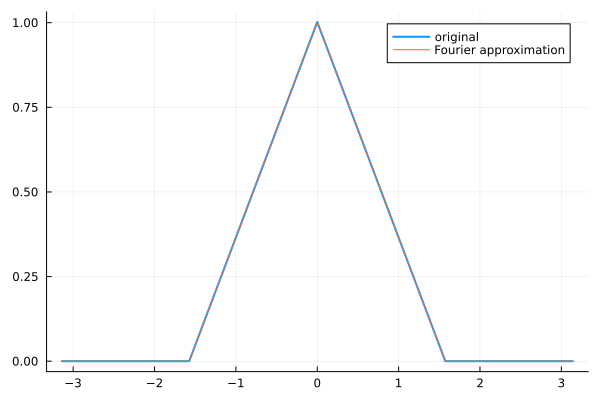

In [14]:
plot(x,f,linewidth=2,label="original")
plot!(x,fFS,label="Fourier approximation")

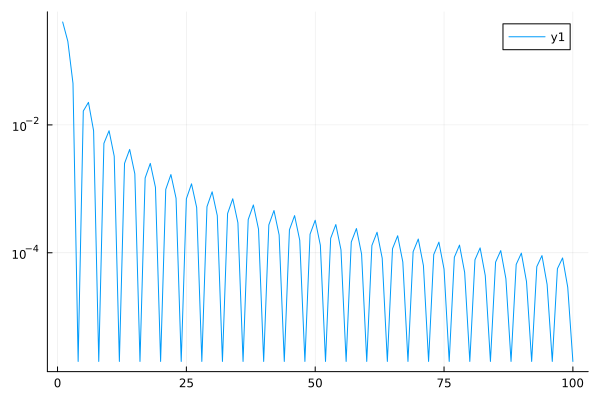

In [15]:
plot(A, yscale = :log10)

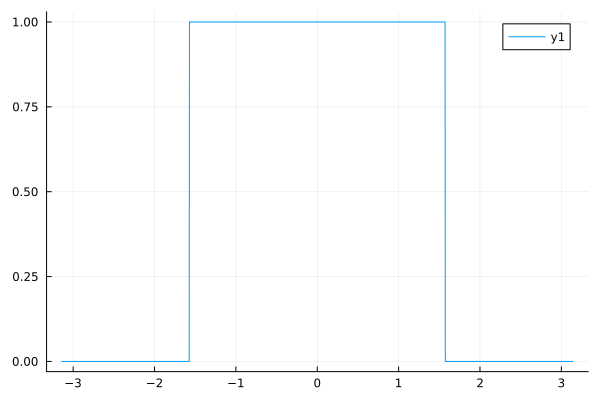

In [18]:
shf = zeros(n)
shf[nquart:3*nquart] .= 1
plot(x,shf)

In [21]:
m = 100
A0 = sum(shf) * dx
A = zeros(m)
B = zeros(m)
fFS = A0/2
for k in 1:m
    A[k] = sum(shf .* cos.(π .* k .* x/L)) * dx
    B[k] = sum(shf .* sin.(π .* k .* x/L)) * dx
    fFS = fFS .+ A[k] * cos.(π * k .* x/L) .+ B[k] * sin.(π * k .* x/L)
end

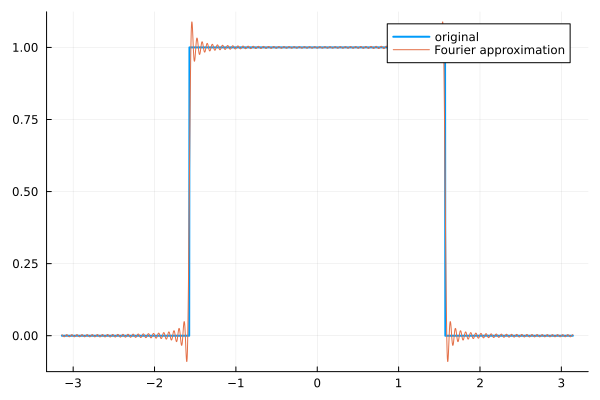

In [22]:
plot(x,shf,linewidth=2,label="original")
plot!(x,fFS,label="Fourier approximation")